In [1]:
import os
os.chdir("..")
print(os.getcwd())

C:\Users\agusr\toxicity-estimator


In [13]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from wordcloud import STOPWORDS, WordCloud, ImageColorGenerator
from PIL import Image

from sklearn.feature_extraction.text import TfidfVectorizer
from src.ruddit import read_ruddit, clean_ruddit, tokenize_ruddit

In [3]:
df = read_ruddit("data/raw/ruddit.csv")

In [4]:
df.head(2)

,text,score
0,> The difference in average earnings between m...,-0.083
1,"The myth is that the ""gap"" is entirely based o...",-0.022


In [5]:
print("---- Comentarios de apoyo ----")
[print("[Comment Score]", c[0], c[1]) for c in df.loc[df.score < -0.5].sample(n=3, random_state=2).values];

---- Comentarios de apoyo ----
[Comment Score] Queens of The Stone Age.  -0.688
[Comment Score] Thanks and good luck! You can do it!! -0.667
[Comment Score] It's not a direct comparison, you're right.  -0.63


In [6]:
print("---- Discursos de odio ----")
[print("[Comment Score]", c[0], c[1]) for c in df.loc[df.score > 0.7].sample(n=3, random_state=2).values];

---- Discursos de odio ----
[Comment Score] Nope.  If the wife gets to fuck someone else, do do you. 0.708
[Comment Score] haha, right? The fuck was his statement even thinking? "Yea, let's crush the economy just a little more!" 0.717
[Comment Score] Don’t fuck a rope. 0.708


--- Distribución de la variable objetivo (datos originales) ---


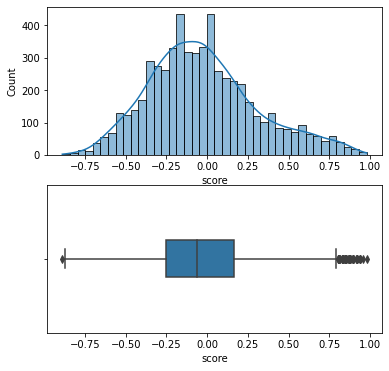

In [7]:
print("--- Distribución de la variable objetivo (datos originales) ---")
fig, ax = plt.subplots(2, figsize=(6, 6))
sns.histplot(df.score, kde=True, ax=ax[0]);
sns.boxplot(data=df, x="score", width=.25, ax=ax[1]);

### Limpieza de datos

* Eliminación comentarios sin información (\[deleted\], URL)
* Conversión a minúsculas
* Emoji
* Eliminación caracteres de control y espacios en blanco
* Normalización simple ("thats" por "that is")

In [9]:
# Hay comentarios que ya se han borrado (Valores [deleted] or [removed])
ccount = df.text.value_counts()
ccount[ccount > 1]

[deleted]    116
[removed]     12
Name: text, dtype: int64

In [10]:
df = clean_ruddit(df)

### Tokenización

* Tokenización basada en reglas* Tokenización basada en reglas
* Eliminación stop words y puntuación
* Lematización

In [11]:
df = tokenize_ruddit(df)

#### Word clouds

In [14]:
# Carga de imágenes 
reddit_mask = np.array(Image.open("data/images/reddit.jpg"))
reddit_mask = np.invert(reddit_mask)
hate_mask = np.array(Image.open("data/images/danger.jpeg"))

In [16]:
text_to_plot = df[df["score"] < 0]["clean_text"].str.replace("|".join(["not", "!"]), "", regex=False)
wordcloud = WordCloud(
    max_font_size=50,
    max_words=500,
    background_color="white",
    mask=reddit_mask,
    colormap="winter"
).generate(" ".join(text_to_plot))

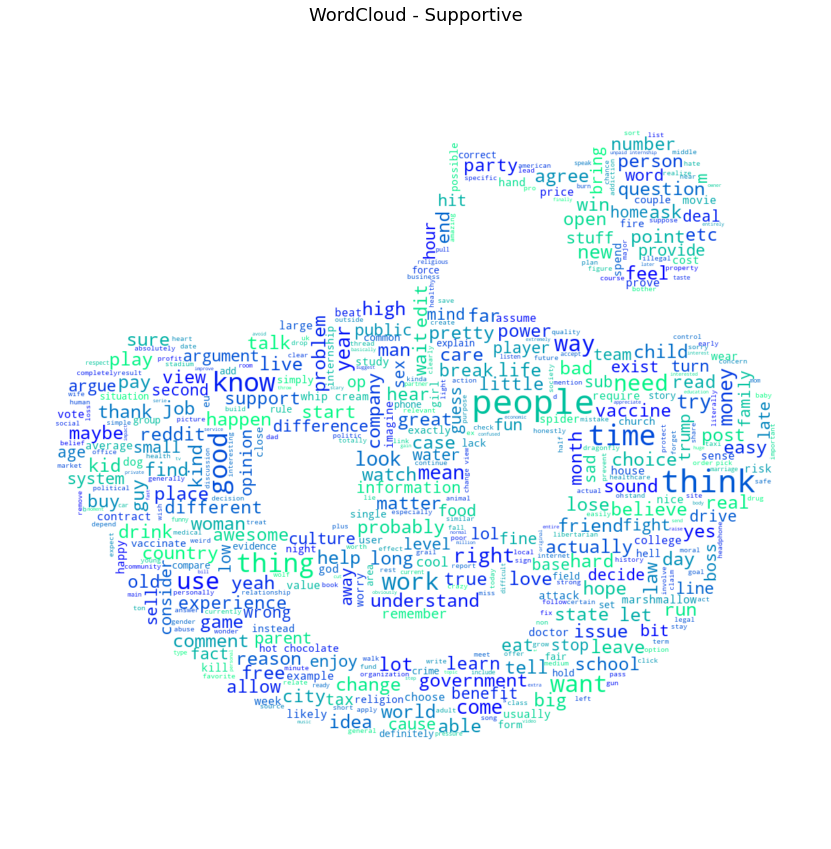

In [18]:
plt.figure(figsize=(15,15))
plt.title("WordCloud - Supportive", fontsize=18)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig("data/images/support-wordcloud.png")
plt.show()

In [20]:
text_to_plot = df[df["score"] > .7]["clean_text"].str.replace("|".join(["not", "!"]), "", regex=False)
wordcloud = WordCloud(
    max_font_size=50,
    max_words=1000,
    background_color="white",
    mask=hate_mask,
    colormap="hot"
).generate(" ".join(text_to_plot))

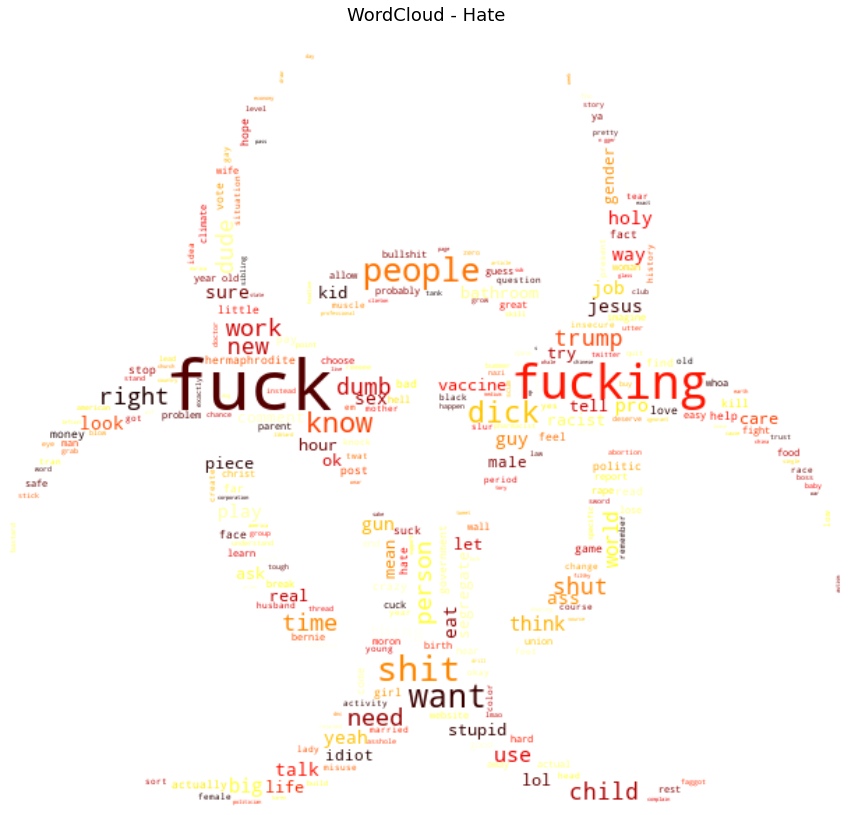

In [21]:
plt.figure(figsize=(15,15))
plt.title("WordCloud - Hate", fontsize=18)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig("data/images/hate-wordcloud.png")
plt.show()

In [22]:
# Preprocesamiento y limpieza
# TODO: Eliminar rutas relativas (/path/to/)
# TODO: Expandir contracciones (IMO, LOL...)
# TODO: Tratar tokens numéricos
# [print("[" + str(i) + "]", "[SCORE:] "+ str(t[1]) + " -", t[0]) for i, t in enumerate(df[df.comment.str.contains("/")].values)];

### Modelo Baseline - TFIDF + regresor

In [23]:
# TODO: Montamos un modelo baseline como punto de partida
"""tfidf = TfidfVectorizer(
    analyzer='word',
    tokenizer=lambda doc: doc,
    preprocessor=lambda doc: doc,
    token_pattern=None
) """
tfidf = None